In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Suppress all warnings 
warnings.filterwarnings("ignore")


In [2]:
train_data = pd.read_csv("./data/train.csv")

In [3]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [6]:
train_data = train_data.drop("id", axis=1)

In [7]:
train_data.shape

(54273, 12)

In [8]:
train_data.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [9]:
# drop model column
train_data = train_data.drop("model", axis=1)

In [10]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [11]:
train_data.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [16]:
# Replace '-' and notsupported values in fuel_type with 'Electric'
train_data.fuel_type.replace('–', 'Electric', inplace=True)

train_data.fuel_type.replace('not supported', 'Electric', inplace=True)

In [17]:
train_data.fuel_type.value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Electric            298
Plug-In Hybrid      182
Name: count, dtype: int64

In [18]:
import re
# Define a function to extract engine attributes

def extract_engine_features(engine_str):
    # Extract displacement
    displacement = re.search(r"(\d+\.\d+)L", engine_str)
    engine_displacement = float(displacement.group(1)) if displacement else None

    # Extract horsepower
    horsepower = re.search(r"(\d+\.\d+)HP", engine_str)
    engine_horsepower = float(horsepower.group(1)) if horsepower else None

    # # Extract number of cylinders
    # num_cylinders = re.search(r"\d+\s?Cylinder", engine_str)
    # num_cylinders = int(num_cylinders.group().split()[0]) if num_cylinders else None

    # # Extract cylinder configuration
    # cylinder_config = "V" if "V" in engine_str else "Straight" if "Straight" in engine_str else None

    # # # Extract fuel type
    # # fuel_type = re.search(r"(Gasoline|Diesel|Electric|Flex Fuel)", engine_str)
    # # fuel_type = fuel_type.group(1) if fuel_type else None

    return engine_displacement, engine_horsepower #, num_cylinders, cylinder_config

In [19]:
# Create two new features from the engine column 
train_data[['horsepower', 'engine_displacement']] = train_data.engine.apply(extract_engine_features).apply(pd.Series)

In [20]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,3.8,200.0


In [21]:
train_data.horsepower.isnull().sum()

606

In [22]:
train_data.engine_displacement.isnull().sum()

4057

In [23]:
# Replace missing horsepower and displacement values with mean
train_data.horsepower.fillna(train_data.horsepower.mean(), inplace =True)
train_data.engine_displacement.fillna(train_data.engine_displacement.mean(), inplace=True)

In [24]:
train_data.horsepower.isnull().sum()

0

In [25]:
train_data.engine_displacement.isnull().sum()

0

In [26]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,3.8,200.0


In [27]:
# drop engine column 
train_data.drop("engine", axis=1, inplace=True)


In [28]:
train_data.shape

(54273, 12)

In [33]:
# Getting car age 
train_data["age"] = 2024 - train_data.model_year

In [34]:
train_data.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement,age
0,Ford,2018,74349,Gasoline,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0,6
1,BMW,2007,80000,Gasoline,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0,17
2,Jaguar,2009,91491,Gasoline,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0,15
3,BMW,2022,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0,2
4,Pontiac,2001,111000,Gasoline,A/T,White,Black,None reported,Yes,7850,3.8,200.0,23


In [35]:
# Drop model year 
train_data.drop("model_year", axis=1, inplace=True)

> INSIGHTS 

* By the end of the data wrangling process these columns were dropped (`model_year`, `engine`, `model`)
* From the `engine` column the `horsepower` and `engine_displacement` were obtained.
* Car `age` was gotten from `model_year`

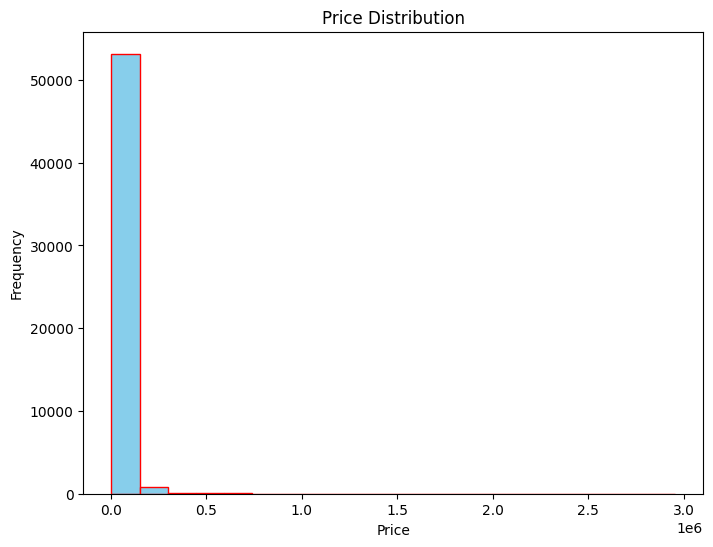

In [38]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.hist(train_data.price, bins=20, color='skyblue', edgecolor = 'red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

 Above histogram shows the price of most cars lie in the lower range of prices



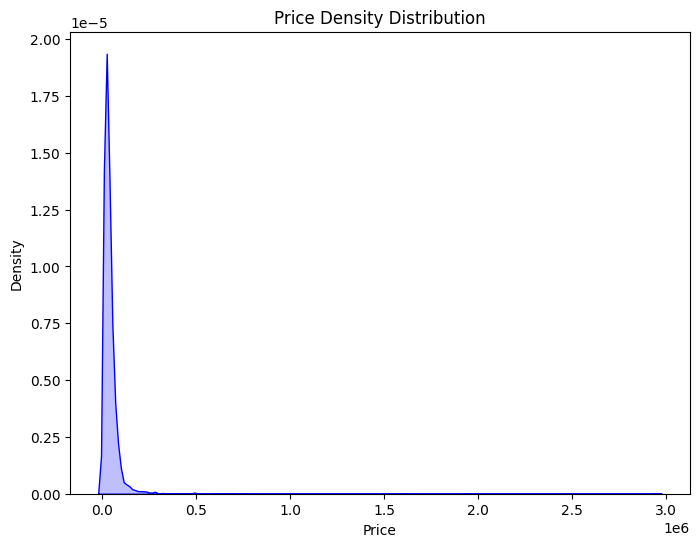

In [42]:
# plot figure to show density distribution 

plt.figure(figsize=(8, 6))
sns.kdeplot(train_data.price, color='blue', shade=True)
plt.title("Price Density Distribution")
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

The above distributions indicates a large amounts of outliers expecially above 0.5 on the price axis